661


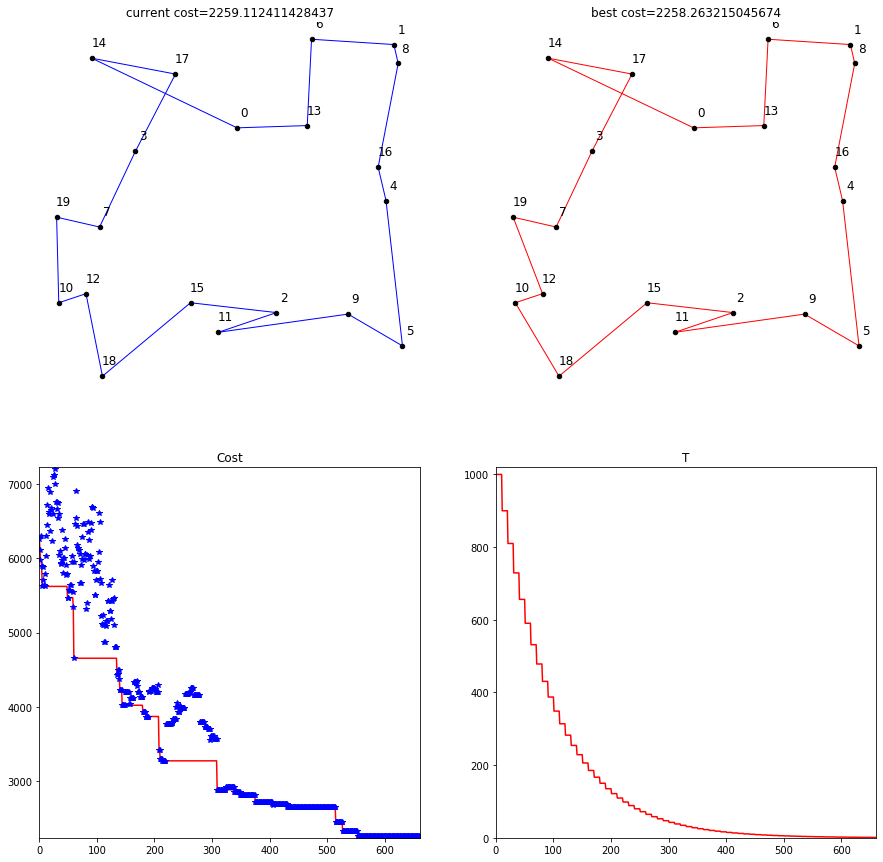

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
import copy
from matplotlib import rc

def COST(sCurrent,g):
    cost=0
    for i in range(len(sCurrent)-1):
        a_x = g.nodes[sCurrent[i]]['attr_dict']['X']
        a_y = g.nodes[sCurrent[i]]['attr_dict']['Y']
        b_x = g.nodes[sCurrent[i+1]]['attr_dict']['X']
        b_y = g.nodes[sCurrent[i+1]]['attr_dict']['Y']
        cost += np.sqrt((b_x-a_x)**2+(b_y-a_y)**2)
    a_x = g.nodes[sCurrent[0]]['attr_dict']['X']
    a_y = g.nodes[sCurrent[0]]['attr_dict']['Y']
    b_x = g.nodes[sCurrent[-1]]['attr_dict']['X']
    b_y = g.nodes[sCurrent[-1]]['attr_dict']['Y']
    cost+= np.sqrt((b_x-a_x)**2+(b_y-a_y)**2)    
    return cost

def ACCEPT(costCurrent,costNew,T):
    return np.exp((costCurrent - costNew)/T)> np.random.rand()


def NEIGHBOR(sCurrent):
    a = np.random.randint(len(sCurrent))
    b = a
    while b == a:
        b = np.random.randint(len(sCurrent))    
    sNew = copy.deepcopy(sCurrent)
    temp = sNew[a]
    sNew[a] = sNew[b]    
    sNew[b] = temp
    return sNew
                     
def Initial_TSP(num):
    arr = np.arange(num)
    np.random.shuffle(arr)
    return arr
    
def SA_TSP(g):
    T = 1000
    T_0 = 1
    alpha = 0.9
    IterL = 10
    sCurrent = Initial_TSP(len(g.nodes))
    sBest = sCurrent
    costCurrent = COST(sCurrent,g)
    costBest = costCurrent
    num = 0
    i = 0
    record = []
    record.append([num, sCurrent, sBest, costCurrent, costBest,T])
    while T > T_0:
        while i < IterL:
            sNew = NEIGHBOR(sCurrent)
            costNew = COST(sNew, g)
            if costNew <costCurrent:
                costCurrent = costNew
                sCurrent = sNew    
                if costNew < costBest:
                    costBest = copy.deepcopy(costNew)
                    sBest = copy.deepcopy(sNew)
            elif ACCEPT(costCurrent, costNew, T):
                costCurrent = costNew
                sCurrent = sNew
            i += 1
            num +=1 
            record.append([num, sCurrent, sBest, costCurrent, costBest,T])
        i= 0
        T = T*alpha


    return record


def Initial_Graph(num):
    X = 500
    Y = 500
    g = nx.Graph()
    for i in range(num):
        x = np.random.randint(X)
        y = np.random.randint(Y)
        g.add_node(i,attr_dict={"X":x,"Y":y})
    return g
        


class UpdateDist:
    def __init__(self, ax1,ax2,ax3,ax4, record,g):
        self.g = g
        self.node_positions = {node[0]: (node[1]['attr_dict']['X'], -node[1]['attr_dict']['Y']) for node in list(g.nodes(data=True))}
        self.record = record

        self.ax1 = ax1
        self.ax2 = ax2
       
        self.x2= np.array([0])
        self.y2= np.array([0])
        self.line2, = ax3.plot([], [], 'r-')
        
        self.x3= np.array([0])
        self.y3= np.array([0])
        self.line3, = ax3.plot([], [], 'b*')
        self.ax3= ax3
        self.ax3.set_xlim(0,len(record))
        temp = [a[3] for a in record]
        self.ax3.set_ylim(min(temp)-20, max(temp)+20)
        self.ax3.set_title("Cost")
        
        self.x4= np.array([0])
        self.y4= np.array([0])
        self.line4, = ax4.plot([], [], 'r-')
        self.ax4= ax4
        self.ax4.set_xlim(0,len(record))
        temp = [a[5] for a in record]
        self.ax4.set_ylim(0, max(temp)+20)
        self.ax4.set_title("T")



    def __call__(self, i):


        # remove all nodes 
        self.ax1.clear()
        self.ax2.clear()
        self.g.remove_edges_from(list(self.g.edges()))

        # current 
        arr = self.record[i][1]
        for k in range(len(arr)-1):
            self.g.add_edge(arr[k],arr[k+1])
        self.g.add_edge(arr[0],arr[len(arr)-1])   
        edge_colors = ["blue"]*len(self.g.edges)
        self.ax1.set_title( "current cost="+ str(self.record[i][3]))
        nx.draw(self.g, pos=self.node_positions,  edge_color=edge_colors, node_size=len(g.nodes),ax=self.ax1, node_color='black')
        
#         # best 
        self.g.remove_edges_from(list(self.g.edges()))
        arr = self.record[i][2]
        for k in range(len(arr)-1):
            self.g.add_edge(arr[k],arr[k+1])
        self.g.add_edge(arr[0],arr[-1])   
        edge_colors = ["red"]*len(self.g.edges)
        self.ax2.set_title("best cost="+ str(self.record[i][4]))
        nx.draw(self.g, pos=self.node_positions,  edge_color=edge_colors, node_size=len(g.nodes),ax=self.ax2, node_color='black')
        node_labels = {}
        for ii in range(len(self.g.nodes(data=True))):
#             aaa=str( list(self.g.nodes(data=True))[ii][0])+" ("+str(list(self.g.nodes(data=True))[ii][1]['attr_dict']['X'] )+", " +str(list(self.g.nodes(data=True))[ii][1]['attr_dict']['Y'] )+")"
            aaa=str( list(self.g.nodes(data=True))[ii][0])
            node_labels[ii] = aaa
            
        text_position = copy.deepcopy(self.node_positions)
        for node in list(text_position.keys()):
            (x,y)=text_position[node]
            text_position[node]=(x+10,y+20)

        nx.draw_networkx_labels(g, text_position,ax=self.ax2,  labels=node_labels)
        nx.draw_networkx_labels(g, text_position,ax=self.ax1,  labels=node_labels)

        if i ==0 :
            self.x2=np.array(i)
            self.y2=np.array(self.record[i][4])
            self.x3=np.array(i)
            self.y3=np.array(self.record[i][3])
            self.x4=np.array(i)
            self.y4=np.array(self.record[i][5])
        else:
            self.x2=np.append(self.x2, i)
            self.y2=np.append(self.y2, self.record[i][4])
            self.x3=np.append(self.x3, i)
            self.y3=np.append(self.y3, self.record[i][3])
            self.x4=np.append(self.x4, i)
            self.y4=np.append(self.y4, self.record[i][5])

        
        self.line2.set_data(self.x2, self.y2)
        self.line3.set_data(self.x3, self.y3)
        self.line4.set_data(self.x4, self.y4)
        
        return self.line2, self.line3, self.line4,
    
np.random.seed(10)
num = 20
g = Initial_Graph(num)
record = SA_TSP(g)

print(len(record))
# print(record[0])

fig,axs = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)

ud = UpdateDist(axs[0][0],axs[0][1],axs[1][0],axs[1][1],record, g)
anim = FuncAnimation(fig, ud, frames=len(record), interval=100, blit=True)
anim.save('./TSP_SA.gif', writer='imagemagick', fps=1)
rc('animation', html='html5')
anim